In [130]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\general_purpose_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\Latency_and_time_functions.ipynb"

####  Read the data

In [120]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/no_outliers_no_baseline.csv"
runs= pd.read_csv(file_path)

#### Plot IQR and median across sessions

In [121]:
# Calculate IQR quantiles and medians for each group, session and condition
iqr = runs.groupby(
    ['group', 'stim_condition', 'session_nr']
)['latency_to_cp_entry'].describe().reset_index()

<Figure size 1800x1200 with 0 Axes>

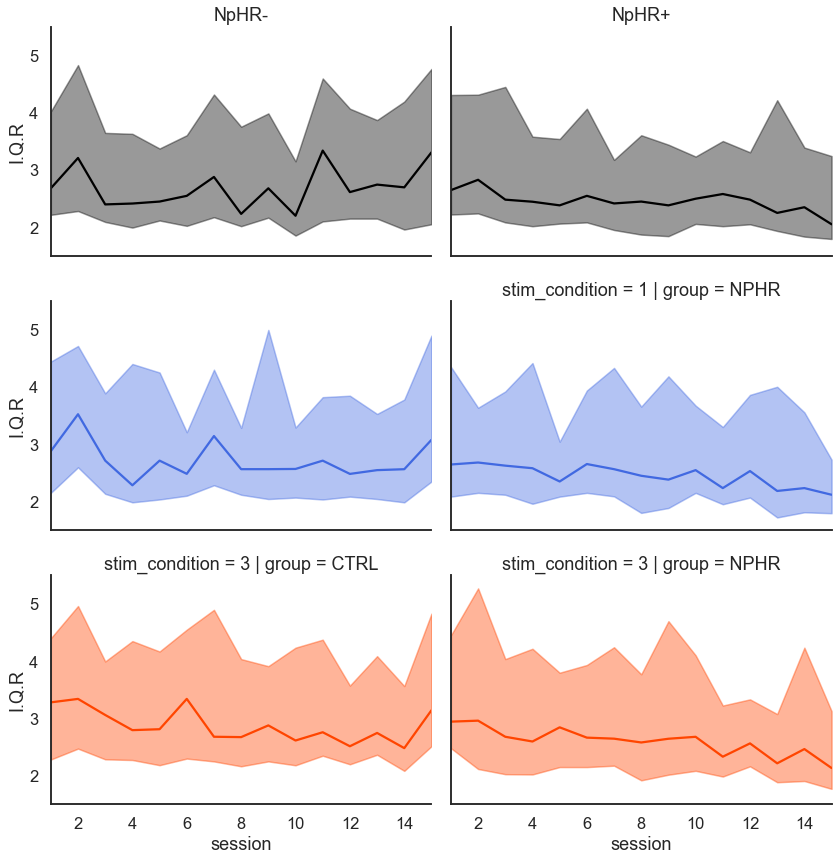

In [124]:
plot_iqr_and_median_across_sessions(iqr)

In [ ]:
#Calculate IQR and medians per rat, condition and session
iqr_rats = runs.groupby(['group', 'rat','stim_condition', 'session_nr'])['latency_to_cp_entry'].describe().reset_index()

<Figure size 1800x1200 with 0 Axes>

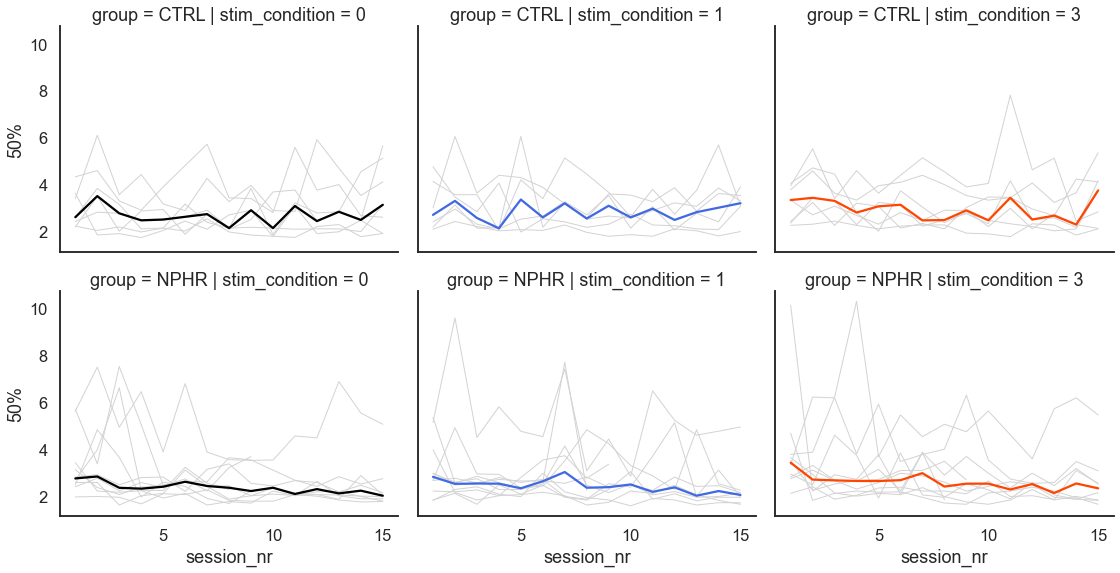

In [131]:
plot_individual_metrics_across_sessions(iqr_rats, '50%')

####  Compare first and last session medians

In [125]:
#Calculate IQR and medians per rat, condition and session
iqr_rats = runs.groupby(['group', 'rat','stim_condition', 'session_nr'])['latency_to_cp_entry'].describe().reset_index()
first_last = iqr_rats[(iqr_rats['session_nr']==1) | (iqr_rats['session_nr']==15)]

<Figure size 1800x1200 with 0 Axes>

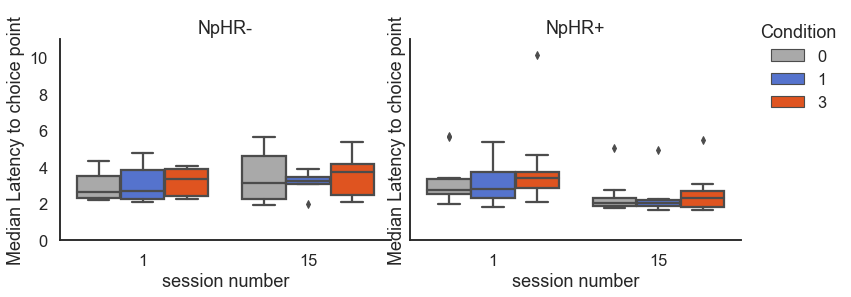

In [126]:
plt.figure(dpi=300)
sns.set(context='talk', style='white')
g=sns.catplot(kind='box',data=first_last, col='group', x='session_nr', y='50%', 
              hue='stim_condition', palette=['darkgray', 'royalblue', 'orangered'],
              height=4, aspect=1.3)
g.set(ylim=[0,11], ylabel='Median Latency to choice point', xlabel='session number', xticks=[0,1],
     xticklabels=['1','15'])
ax=g.axes.flatten()
ax[0].set_title('NpHR-')
ax[1].set_title('NpHR+')
g._legend.set(title='Condition', bbox_to_anchor=[.97,.8])
sns.despine()

####  Compare first and medians across groups

<Figure size 1800x1200 with 0 Axes>

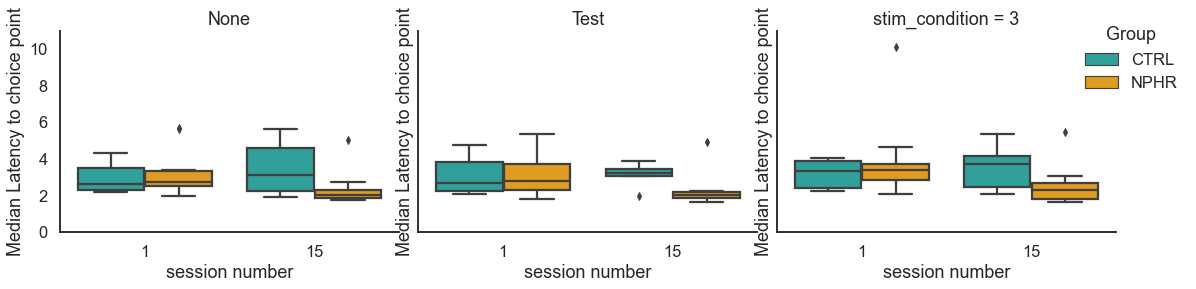

In [136]:
plt.figure(dpi=300)
sns.set(context='talk', style='white')
g=sns.catplot(kind='box',data=first_last, hue='group', x='session_nr', y='50%', 
              col='stim_condition', palette=['lightseagreen', 'orange'],
              height=4, aspect=1.3)
g.set(ylim=[0,11], ylabel='Median Latency to choice point', xlabel='session number', xticks=[0,1],
     xticklabels=['1','15'])
ax=g.axes.flatten()
ax[0].set_title('None')
ax[1].set_title('Sample')
ax[1].set_title('Test')
g._legend.set(title='Group', bbox_to_anchor=[.97,.8])
sns.despine()

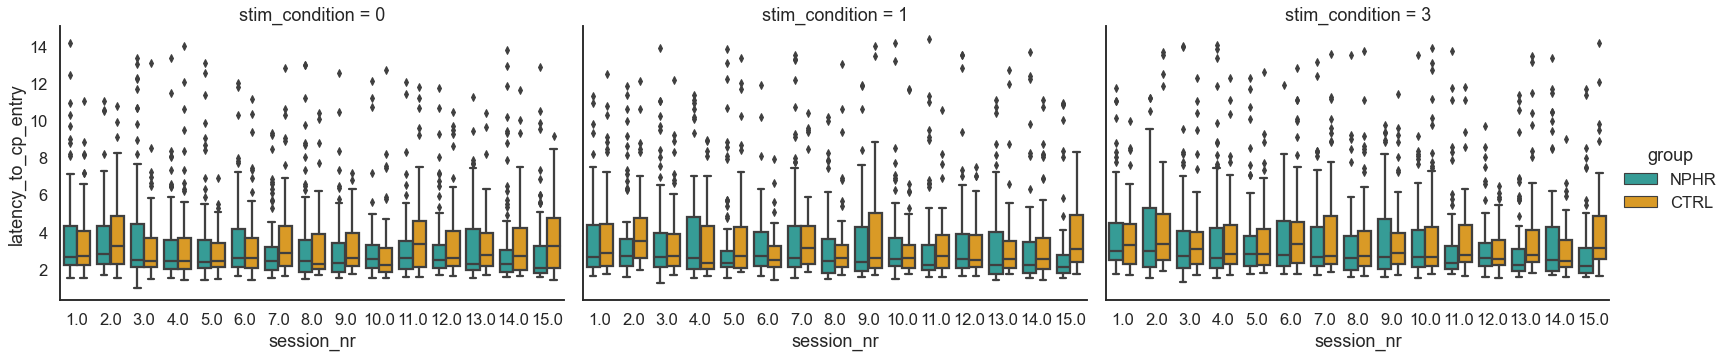

In [281]:
sns.set(style='white', context='talk')
g = sns.catplot(kind='box', data=below15, col='stim_condition', x='session_nr',
                y='latency_to_cp_entry', hue='group', palette=['lightseagreen', 'orange'],
                height=5, aspect=1.5, saturation=.7)